# Project: Fake News Detection Through Natural Language Processing

## ML1010 - Group JSMCJ - Project Proposal



# 1. Data preparation

### Import libraries and data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

## Real News dataset preparation

Source: https://www.kaggle.com/snapcrack/all-the-news

In [3]:
# Reading data from the csv files
df1 = pd.read_csv("../data/articles1.csv")
df2 = pd.read_csv("../data/articles2.csv")
df3 = pd.read_csv("../data/articles3.csv")

We have a dataset of fake news collected in November 2016 (source: https://www.kaggle.com/mrisdal/fake-news/home). For our dataset of real news, we want to collect news articles that were published from October to December of 2016. That gives us ample data points we can use to build classification models.

In [4]:
# Sollecting news articles that were published from October to December of 2016
df1 = df1.loc[df1['year'] == 2016.0]
df1 = df1.loc[df1['month'].isin([10.0,11.0,12.0])]
df1.head(4)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...
2547,2547,20127,U.S. Plans to Step Up Military Campaign Agains...,New York Times,Michael S. Schmidt and Eric Schmitt,2016-12-21,2016.0,12.0,NaN,"ABU DHABI, United Arab Emirates — The Obama..."


In [5]:
# Sollecting news articles that were published from October to December of 2016
df2 = df2.loc[df2['year'] == 2016.0]
df2 = df2.loc[df2['month'].isin([10.0,11.0,12.0])]
df2.head(4)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
3654,56963,78255,Trump Time Capsule #124: Taxes,Atlantic,James Fallows,2016-10-02,2016.0,10.0,NaN,People will look back on this era in our histo...
3655,56964,78256,What Do You Know ... About Human Organs?,Atlantic,Rosa Inocencio Smith,2016-10-01,2016.0,10.0,NaN,"Each week, we collect the most surprising fact..."
3656,56965,78259,Track of the Day: ’Mary’s Song’ by Nick Cave,Atlantic,Chris Bodenner,2016-10-02,2016.0,10.0,NaN,An ongoing collection from readers of the song...
3657,56966,78260,Track of the Day: ’Baba O’Riley’ by The Who,Atlantic,Chris Bodenner,2016-10-01,2016.0,10.0,NaN,", A reader, Tim, floats an idea: Inspired by..."


In [6]:
# Sollecting news articles that were published from October to December of 2016
df3 = df3.loc[df3['year'] == 2016.0]
df3 = df3.loc[df3['month'].isin([10.0,11.0,12.0])]
df3.head(4)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
5,103464,151914,My dad’s Reagan protests inspire me to stand u...,Guardian,Steven W Thrasher,2016-11-28,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,I have been battling depression and sleeplessn...
8,103467,151917,NSA contractor arrested for alleged theft of t...,Guardian,Ewen MacAskill,2016-10-05,2016.0,10.0,https://www.theguardian.com/us-news/2016/oct/0...,The FBI has arrested a National Security Agenc...


Now we want to examine the various publications in each csv file.

In [7]:
publications1 = np.unique(df1["publication"].values)
publications2 = np.unique(df2["publication"].values)
publications3 = np.unique(df3["publication"].values)
print(publications1)
print(publications2)
print(publications3)

['Atlantic' 'Breitbart' 'Business Insider' 'CNN' 'New York Times']
['Atlantic' 'Buzzfeed News' 'Fox News' 'Guardian' 'National Review'
 'New York Post' 'Talking Points Memo']
['Guardian' 'NPR' 'Reuters' 'Vox' 'Washington Post']


We want to select several reputable publications for the real news dataset, as well as several other 'less-reputable' publications, in order to have a more balanced representation of news published by a real news publication company. Those included are listed below. We used a media bias/fact check website (source: https://mediabiasfactcheck.com/) to assess each news publication company. The results are below (each company is rated on their factual reporting).

Factual reporting:
- Very High: reuters, npr
- High: new york times, atlantic, guardian, washington post, vox
- Mixed: fox news, cnn, national review


In [8]:
df = pd.concat([df1,df2,df3])
df = df.loc[df['publication'].isin(['New York Times', 'CNN','Atlantic','Fox News','Guardian','National Review','NPR','Reuters', 'Vox','Washington Post'])]

In [9]:
# Renaming 'content' column as 'text', to match the name of the text news variable from the fake news dataset
df = df.rename(columns={'content': 'text'})

In [10]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,text
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...
2547,2547,20127,U.S. Plans to Step Up Military Campaign Agains...,New York Times,Michael S. Schmidt and Eric Schmitt,2016-12-21,2016.0,12.0,NaN,"ABU DHABI, United Arab Emirates — The Obama..."
2551,2551,20131,272 Slaves Were Sold to Save Georgetown. What ...,New York Times,Rachel L. Swarns,2016-12-15,2016.0,12.0,NaN,WASHINGTON — The human cargo was loaded on ...


In [11]:
df.dtypes

Unnamed: 0       int64
id               int64
title           object
publication     object
author          object
date            object
year           float64
month          float64
url             object
text            object
dtype: object

In [12]:
# Converting month variable from float to integer
df['month'] = pd.DataFrame(df['month'])

In [13]:
df['month'] = df['month'].astype(int)

In [14]:
df['month'].head()

0       12
8       12
9       12
2547    12
2551    12
Name: month, dtype: int64

In [15]:
# Selecting only columns that are common with the fake news dataset
real_news = df[['id', 'author', 'title', 'text', 'date', 'month', 'url']]

In [16]:
# Creating Target variable called "fake".  It will have a value of 0 for real news and 1 for fake news
real_news["fake"] = 0

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
real_news.head()

,id,author,title,text,date,month,url,fake
0,17283,Carl Hulse,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,2016-12-31,12,NaN,0
8,17291,Katherine Rosman,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",2016-12-31,12,NaN,0
9,17292,Andy Newman,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,2016-12-31,12,NaN,0
2547,20127,Michael S. Schmidt and Eric Schmitt,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",2016-12-21,12,NaN,0
2551,20131,Rachel L. Swarns,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,2016-12-15,12,NaN,0


In [18]:
real_news.shape

(15712, 8)

In [19]:
# Saving data frame as a new csv file called "real_news.csv".
real_news.to_csv('real_news.csv', encoding='utf-8')

## Fake News dataset preparation

In [20]:
fake = pd.read_csv("../data/fake.csv")

In [21]:
fake.head(4)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [22]:
fake.shape

(12999, 20)

In [23]:
fake.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [24]:
# Selecting English language articles only
english_fake_news = fake[fake["language"] == "english"]

In [25]:
english_fake_news.shape

(12403, 20)

In [26]:
# Selecting "BS" type English articles only
all_fake_news = english_fake_news[english_fake_news["type"] == "bs"]

In [27]:
all_fake_news.shape

(10900, 20)

In [28]:
# Counting missing values
all_fake_news.isnull().sum()

uuid                     0
ord_in_thread            0
author                1731
published                0
title                  573
text                     0
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           3990
thread_title            12
spam_score               0
main_img_url          3310
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

In [29]:
# Visual observation of the CSV file reveals that 'title' = 'thread_title'.  
# Therefore, for the cases where title is missing, we impute the thread_title. 
# We will also replace the Nulls in 'title' with blanks ('')
all_fake_news.loc[all_fake_news.title.isnull(),'title'] = \
    all_fake_news.loc[all_fake_news.title.isnull(),'thread_title']
all_fake_news.loc[all_fake_news.title.isnull(),'title'] = ''

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
# Counting missing values again
all_fake_news.isnull().sum()
# title now has 0 null values

uuid                     0
ord_in_thread            0
author                1731
published                0
title                    0
text                     0
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           3990
thread_title            12
spam_score               0
main_img_url          3310
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

In [31]:
all_fake_news.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [32]:
# Processing published date variable to extract the month from it
pd.to_datetime(all_fake_news['published'], format='%Y-%m-%d %H:%M:%S.%f')

59      2016-10-27 03:14:00.000
60      2016-10-26 20:12:00.000
61      2016-10-26 19:48:00.000
62      2016-10-26 19:35:00.000
63      2016-10-26 19:19:00.000
64      2016-10-26 19:07:00.000
65      2016-10-26 19:07:00.000
66      2016-10-26 19:35:00.000
67      2016-10-26 19:19:00.000
68      2016-10-26 19:07:00.000
69      2016-10-28 00:19:50.476
70      2016-10-27 18:50:00.000
71      2016-10-27 18:30:00.000
72      2016-10-27 20:03:00.000
73      2016-10-27 19:57:00.000
74      2016-10-27 18:50:00.000
75      2016-10-27 18:30:00.000
76      2016-10-27 18:50:00.000
77      2016-10-27 18:30:00.000
78      2016-10-27 18:30:00.000
79      2016-10-28 11:03:12.156
80      2016-10-28 08:58:00.000
81      2016-10-28 20:31:03.391
82      2016-10-28 17:39:00.000
83      2016-10-28 17:00:00.000
84      2016-10-29 08:56:37.068
85      2016-10-29 06:34:00.000
86      2016-10-29 12:58:39.811
87      2016-10-29 07:38:00.000
88      2016-10-29 20:54:43.950
                  ...          
12969   

In [33]:
all_fake_news['published'].dtypes

dtype('O')

In [34]:
all_fake_news['published'] = pd.to_datetime(all_fake_news['published'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
all_fake_news['published'].head()

59   2016-10-27 03:14:00
60   2016-10-26 20:12:00
61   2016-10-26 19:48:00
62   2016-10-26 19:35:00
63   2016-10-26 19:19:00
Name: published, dtype: datetime64[ns]

In [36]:
all_fake_news['published'].dtypes

dtype('<M8[ns]')

In [37]:
all_fake_news.loc[:,'month'] = all_fake_news['published'].dt.month

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
all_fake_news.head(4)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,month
59,b9af57aaf67e5894ea9cee78d8f646aecaa0ebd9,0,tokyowashi (noreply@blogger.com),2016-10-27 03:14:00,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,english,2016-10-27T07:37:58.775+03:00,abeldanger.net,US,...,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs,10
60,03905a0f06cb711190aad3934af253a0e1c00a83,1,Anonymous,2016-10-26 20:12:00,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,"So ,you have Rothschild banksters and British ...",english,2016-10-27T07:37:58.893+03:00,abeldanger.net,US,...,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs,10
61,42c16d3818e64ff4632409cafd309c22df530ac1,2,Anonymous,2016-10-26 19:48:00,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,Here is the problem . The USA constitution sta...,english,2016-10-27T07:37:58.902+03:00,abeldanger.net,US,...,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs,10
62,336f5dfbea5f263dbdd6ec9be9d1d94d255caa1f,3,Anonymous,2016-10-26 19:35:00,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,There is plenty of proof the machines are rigg...,english,2016-10-27T07:37:58.915+03:00,abeldanger.net,US,...,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs,10


In [39]:
all_fake_news.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type', 'month'],
      dtype='object')

In [40]:
real_news.columns

Index(['id', 'author', 'title', 'text', 'date', 'month', 'url', 'fake'], dtype='object')

In [41]:
# Renaming columns to have same name as columns of the 'real' news dataset
all_fake_news = all_fake_news.rename(columns={'uuid': 'id', 'published': 'date', 'site_url': 'url'})

In [42]:
all_fake_news.columns

Index(['id', 'ord_in_thread', 'author', 'date', 'title', 'text', 'language',
       'crawled', 'url', 'country', 'domain_rank', 'thread_title',
       'spam_score', 'main_img_url', 'replies_count', 'participants_count',
       'likes', 'comments', 'shares', 'type', 'month'],
      dtype='object')

In [43]:
# Selecting only columns that are common with the real news dataset
fake_news = all_fake_news[['id', 'author', 'title', 'text', 'date', 'month','url']]

In [44]:
fake_news.columns

Index(['id', 'author', 'title', 'text', 'date', 'month', 'url'], dtype='object')

In [45]:
fake_news.shape

(10900, 7)

In [46]:
# Creating Target variable called "fake".  It will have a value of 0 for real news items and 1 for fake news items
fake_news.loc[:,"fake"] = 1

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
fake_news.shape

(10900, 8)

In [48]:
fake_news.head(4)

,id,author,title,text,date,month,url,fake
59,b9af57aaf67e5894ea9cee78d8f646aecaa0ebd9,tokyowashi (noreply@blogger.com),#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,2016-10-27 03:14:00,10,abeldanger.net,1
60,03905a0f06cb711190aad3934af253a0e1c00a83,Anonymous,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,"So ,you have Rothschild banksters and British ...",2016-10-26 20:12:00,10,abeldanger.net,1
61,42c16d3818e64ff4632409cafd309c22df530ac1,Anonymous,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,Here is the problem . The USA constitution sta...,2016-10-26 19:48:00,10,abeldanger.net,1
62,336f5dfbea5f263dbdd6ec9be9d1d94d255caa1f,Anonymous,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,There is plenty of proof the machines are rigg...,2016-10-26 19:35:00,10,abeldanger.net,1


In [49]:
# Saving data frame as a new csv file called "fake_news.csv".
fake_news.to_csv('fake_news.csv', encoding='utf-8')

## Combined Real-Fake News dataset preparation

### Merging real_news and fake_news datasets

In [50]:
frames = [real_news, fake_news]

In [51]:
real_fake = pd.concat(frames)

In [52]:
real_fake.columns

Index(['id', 'author', 'title', 'text', 'date', 'month', 'url', 'fake'], dtype='object')

In [53]:
real_fake.shape

(26612, 8)

In [54]:
real_fake.head()

,id,author,title,text,date,month,url,fake
0,17283,Carl Hulse,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,2016-12-31,12,NaN,0
8,17291,Katherine Rosman,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",2016-12-31,12,NaN,0
9,17292,Andy Newman,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,2016-12-31,12,NaN,0
2547,20127,Michael S. Schmidt and Eric Schmitt,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",2016-12-21,12,NaN,0
2551,20131,Rachel L. Swarns,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,2016-12-15,12,NaN,0


In [55]:
# converting target variable ("fake" column) to "category" (factor)
real_fake['fake'] = real_fake.fake.astype('category')

In [56]:
real_fake.dtypes

id          object
author      object
title       object
text        object
date        object
month        int64
url         object
fake      category
dtype: object

### Saving data frame as a new csv file called "real_fake_news.csv".

In [57]:
real_fake.to_csv("../data/real_fake_news.csv", encoding='utf-8',index_label=False)



# 2. Exploratory Data Analysis (EDA)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import scipy.stats as spstats
import datetime
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
import nltk
# nltk.download('punkt')  ## run this command only if you don't have the 'punkt' package already installed
import spacy
nlp = spacy.load('en', parse = False, tag=False, entity=False)
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [59]:
all_news = real_fake

In [60]:
all_news.head(5)

,id,author,title,text,date,month,url,fake
0,17283,Carl Hulse,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,2016-12-31,12,NaN,0
8,17291,Katherine Rosman,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",2016-12-31,12,NaN,0
9,17292,Andy Newman,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,2016-12-31,12,NaN,0
2547,20127,Michael S. Schmidt and Eric Schmitt,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",2016-12-21,12,NaN,0
2551,20131,Rachel L. Swarns,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,2016-12-15,12,NaN,0


## Dataframe dimensions and data types

In [61]:
all_news.shape

(26612, 8)

In [62]:
all_news.dtypes

id          object
author      object
title       object
text        object
date        object
month        int64
url         object
fake      category
dtype: object

In [63]:
# Converting month variable to "category" (factor)
all_news['month'] = all_news.month.astype('category')

In [64]:
all_news.dtypes

id          object
author      object
title       object
text        object
date        object
month     category
url         object
fake      category
dtype: object

## Summary statistics

In [65]:
all_news.describe()

,id,author,title,text,date,month,url,fake
count,26612,23136,26612,26612,26612,26612,22001,26612
unique,26612,6298,25635,26141,10298,3,11311,2
top,88cf2e024d80f3a92a7bbac9797299209b5c978f,admin,Caught On Tape: ISIS Destroys Abrams Tank With...,,2016-11-09,11,abeldanger.net,0
freq,1,199,43,104,252,10816,100,15712


### Counts categorical data

In [66]:
all_news['fake'].value_counts()

0    15712
1    10900
Name: fake, dtype: int64

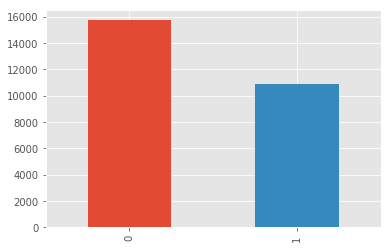

In [67]:
all_news['fake'].value_counts().plot(kind='bar')

In [68]:
all_news['month'].value_counts()

11    10816
10    10483
12     5313
Name: month, dtype: int64

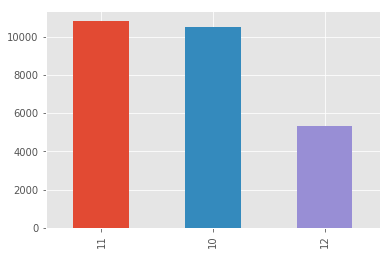

In [69]:
all_news['month'].value_counts().plot(kind='bar')

### Count missing values

In [70]:
all_news.isnull().sum()
# Author and url have missing values, but they are not relevant features for our analysis  
# No missing values in title and text

id           0
author    3476
title        0
text         0
date         0
month        0
url       4611
fake         0
dtype: int64

### Merging title and text for text exploratory analysis

In [71]:
all_text = all_news.title.str.cat(all_news.text, sep=' ')

In [72]:
all_text.head()

0       House Republicans Fret About Winning Their Hea...
8       First, a Mixtape. Then a Romance. - The New Yo...
9       Calling on Angels While Enduring the Trials of...
2547    U.S. Plans to Step Up Military Campaign Agains...
2551    272 Slaves Were Sold to Save Georgetown. What ...
Name: title, dtype: object

### Count missing values in the text data

In [73]:
if all_text is None:
    print(all_text)
# No output - there are no missing values in the text for mining

In [74]:
# Fill any blank fields
all_text.fillna("", inplace=True)

In [75]:
# Tokenization
words = nltk.word_tokenize(" ".join(all_text.tolist()))

In [76]:
words_df = pd.DataFrame(words)

In [77]:
words_df.head()

,0
0,House
1,Republicans
2,Fret
3,About
4,Winning


In [78]:
# Cleaning/stopword removal
from nltk.corpus import stopwords
import string

stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

### Wordcloud

In [79]:
from wordcloud import WordCloud, STOPWORDS

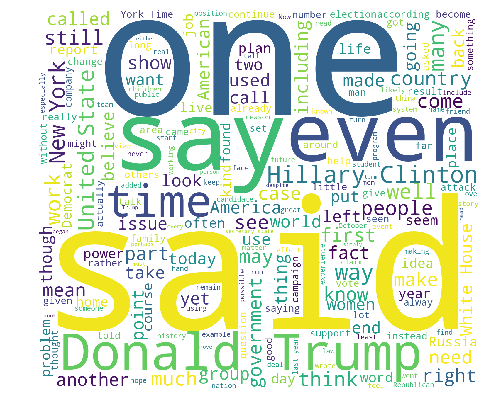

In [81]:
# creating wordcloud (i.e., visual representation of text data) 
# the wordcloud displays a list of words, the importance of each beeing shown with font size or color

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1300
                         ).generate(" ".join(cleanwords))

plt.figure( figsize=(14,7))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [82]:
# Bigram analysis
# Bigrams (pairs of consecutive written units like letters, syllables, or words)

bigrams = nltk.bigrams(cleanwords)

In [83]:
# most common bigrams
from collections import Counter

counter = Counter(bigrams)
print(counter.most_common(10))

[(('Donald', 'Trump'), 18818), (('Hillary', 'Clinton'), 14170), (('United', 'States'), 12861), (('New', 'York'), 11430), (('White', 'House'), 6832), (('York', 'Times'), 4467), (('The', 'New'), 3555), (('years', 'ago'), 3327), (('President', 'Obama'), 3121), (('Washington', 'Post'), 3085)]


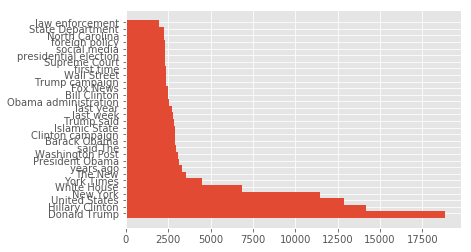

In [84]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

#plt.bar(indexes, values, width)
#plt.xticks(indexes + width * 0.5, labels, rotation=90)

plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.2, labels)
plt.show()